In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,VotingClassifier, RandomForestClassifier
df = pd.read_csv(r"/content/sample_data/Heart.csv")
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
723
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Non

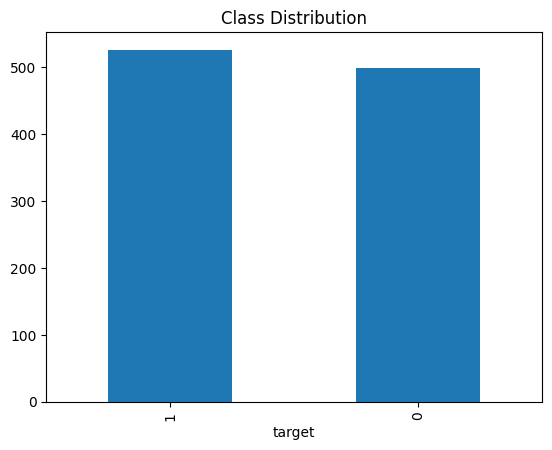

In [3]:
# 1

print(df.isnull().sum())
print(df.duplicated().sum())
print(df.info())
print(df["target"].value_counts())
df["target"].value_counts().plot(kind="bar", title="Class Distribution")
plt.show()


In [4]:

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=0, stratify=y_train
)


In [5]:
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_final, y_train_final)
rf_y_pred_val = rf_model.predict(X_val)

print(f"Random Forest Traning Accuracy : {accuracy_score(y_val,rf_y_pred_val )}")

adb = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
adb.fit(X_train_final, y_train_final)
adb_y_pred_val = adb.predict(X_val)
print(f"Adaboost Traning Accuracy : {accuracy_score(y_val,adb_y_pred_val )}")


xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric="logloss")

xgb_model.fit(X_train_final, y_train_final)
xg_y_pred_val = xgb_model.predict(X_val)
print(f"XGBoost Traning Accuracy : {accuracy_score(y_val,xg_y_pred_val )}")


print(f"Random Forest Testing Accuracy :{accuracy_score(y_test,rf_model.predict(X_test))}")
print(f"Adaboost Testing Accuracy :{accuracy_score(y_test,adb.predict(X_test))}")
print(f"XGBoost Testing Accuracy :{accuracy_score(y_test,xgb_model.predict(X_test))}")

Random Forest Traning Accuracy : 1.0
Adaboost Traning Accuracy : 0.8495934959349594
XGBoost Traning Accuracy : 0.975609756097561
Random Forest Testing Accuracy :0.9853658536585366
Adaboost Testing Accuracy :0.8829268292682927
XGBoost Testing Accuracy :0.9853658536585366


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:46:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [6]:
#2
X = df[["restecg", "oldpeak"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

dt = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=0,
                    use_label_encoder=False, eval_metric="logloss")

In [7]:
voting_hard = VotingClassifier(
    estimators=[("dt", dt), ("knn", knn), ("rf", rf), ("xgb", xgb)],
    voting="hard"
)
voting_hard.fit(X_train, y_train)
hard_acc = accuracy_score(y_test, voting_hard.predict(X_test))

voting_soft = VotingClassifier(
    estimators=[("dt", dt), ("knn", knn), ("rf", rf), ("xgb", xgb)],
    voting="soft"
)
voting_soft.fit(X_train, y_train)
soft_acc = accuracy_score(y_test, voting_soft.predict(X_test))

print("Hard Voting Accuracy:", hard_acc)
print("Soft Voting Accuracy:", soft_acc)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:46:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Hard Voting Accuracy: 0.7414634146341463
Soft Voting Accuracy: 0.751219512195122


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:46:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [14]:
# Updating Weights
from itertools import product
best_weights =None
best_acc =0
for weight in product([1,2,3],repeat = 4):
    weighted = VotingClassifier(
        estimators=[("dt", dt), ("knn", knn), ("rf", rf), ("xgb", xgb)],
        voting="soft",weights=weight
    )
    weighted.fit(X_train, y_train)
    soft_acc = accuracy_score(y_test, weighted.predict(X_test))
    if soft_acc > best_acc:
        best_acc = soft_acc
        best_weight = weight

print(f"Best Weights: {best_weight}, Best Accuracy: {best_acc}")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:53:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:53:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:53:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:53:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:53:55] WARNING: /w

Best Weights: (1, 2, 1, 1), Best Accuracy: 0.7609756097560976


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:54:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# 3
X = df[["restecg", "chol"]]
y = df["target"]

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf_train_acc = accuracy_score(y_train, rf.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test))
print("Random Forest Train:", rf_train_acc, " Test:", rf_test_acc)

adb = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
adb.fit(X_train, y_train)
adb_train_acc = accuracy_score(y_train, adb.predict(X_train))
adb_test_acc = accuracy_score(y_test, adb.predict(X_test))
print("AdaBoost Train:", adb_train_acc, " Test:", adb_test_acc)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators=[("rf", rf), ("adb", adb)],
    voting="soft"
)
voting.fit(X_train, y_train)
voting_acc = accuracy_score(y_test, voting.predict(X_test))
print("Voting Classifier Test :", voting_acc)



In [ ]:
import matplotlib.pyplot as plt

models = ["RF Train", "RF Test","ABD Train", "ABD Test","VE Test"]

accuracies = [rf_train_acc, rf_test_acc,adb_train_acc, adb_test_acc,voting_acc]

plt.figure(figsize=(10,6))
plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Training & Testing Accuracy Comparison")
plt.show()
